
# Probabilidad para Data Science

**Objetivo del notebook:**  
Comprender los conceptos clave de probabilidad que se usan en modelos de clasificación, inferencia, A/B testing y análisis de riesgos.

## Índice
1. Experimentos aleatorios y espacio muestral
2. Probabilidad de eventos
3. Probabilidad condicional
4. Teorema de Bayes (con ejemplo práctico)
5. Variables aleatorias y distribuciones
6. Simulación: Ley de los Grandes Números
7. Ejercicios sencillos



## 1. Experimentos aleatorios y espacio muestral

Un **experimento aleatorio** es cualquier proceso cuyo resultado no podemos predecir con certeza, pero sí podemos describirlo con probabilidades.

Ejemplos:
- Lanzar una moneda.
- Lanzar un dado.
- Ver si un usuario hace clic en un anuncio.

El **espacio muestral** es el conjunto de posibles resultados.

- Moneda: \(\Omega = \{\text{Cara}, \textCruz\}\)
- Dado: \(\Omega = \{1, 2, 3, 4, 5, 6\}\)

Un **evento** es un subconjunto del espacio muestral.  
Ejemplo: "sacar un número par" al tirar un dado = \{2, 4, 6\}.



## 2. Probabilidad de eventos

Si todos los resultados son igual de probables, la probabilidad de un evento \(A\) es:

\[
P(A) = \frac{\text{número de casos favorables}}{\text{número de casos posibles}}
\]

Ejemplo con un dado justo:
- Probabilidad de sacar un 3: \(P(\{3\}) = 1/6\).
- Probabilidad de sacar un número par: \(P(\{2, 4, 6\}) = 3/6 = 1/2\).



### Ejercicio 1

1. En un dado justo, ¿cuál es la probabilidad de sacar un número mayor que 4?
2. ¿Y de sacar un número impar?
3. Escríbelo primero a mano, luego intenta simular muchas tiradas con Python y aproximar la probabilidad.


In [ ]:

import numpy as np

rng = np.random.default_rng(0)

# Simulación de 10000 tiradas de dado
n = 10000
tiradas = rng.integers(1, 7, size=n)  # 1 a 6

prob_mayor_4 = np.mean(tiradas > 4)
prob_impar = np.mean(tiradas % 2 == 1)

print("Probabilidad aproximada (simulación):")
print("P(resultado > 4) ≈", prob_mayor_4)
print("P(resultado impar) ≈", prob_impar)



## 3. Probabilidad condicional

La **probabilidad condicional** \(P(A \mid B)\) es la probabilidad de que ocurra \(A\) sabiendo que ha ocurrido \(B\).

Fórmula:

\[
P(A \mid B) = \frac{P(A \cap B)}{P(B)}
\]

Ejemplo en Data Science:  
- \(A\) = "usuario hace clic".  
- \(B\) = "usuario viene desde móvil".  
- \(P(A \mid B)\) = probabilidad de clic **dado** que el usuario está en móvil.



### Ejemplo sencillo con Python

Tenemos 1000 visitas a una web:
- 400 vienen desde móvil, 600 desde PC.
- De móvil, 80 hacen clic.
- De PC, 60 hacen clic.


In [ ]:

# Datos del ejemplo
visitas_total = 1000
movil = 400
pc = 600

clic_movil = 80
clic_pc = 60

p_movil = movil / visitas_total
p_pc = pc / visitas_total

p_clic = (clic_movil + clic_pc) / visitas_total

p_clic_dado_movil = clic_movil / movil
p_clic_dado_pc = clic_pc / pc

print("P(móvil) =", p_movil)
print("P(PC) =", p_pc)
print("P(clic) =", p_clic)
print("P(clic | móvil) =", p_clic_dado_movil)
print("P(clic | PC) =", p_clic_dado_pc)



### Ejercicio 2

1. ¿Cuál es la probabilidad de que un usuario sea de móvil **y** haga clic?
2. ¿Cómo puedes obtenerla a partir de `P(clic | móvil)` y `P(móvil)`?


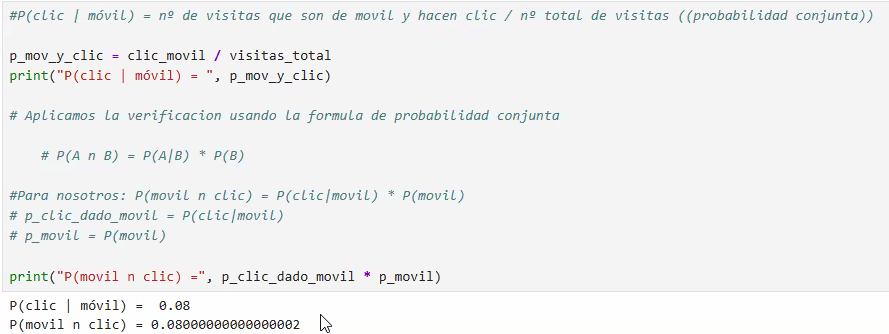


## 4. Teorema de Bayes (con ejemplo práctico)

El **Teorema de Bayes** relaciona probabilidades condicionales en dos direcciones:

\[
P(A \mid B) = \frac{P(B \mid A)\, P(A)}{P(B)}
\]

En Data Science se usa en modelos **bayesianos**, **Naive Bayes**, filtrado de spam, etc.

### Ejemplo típico: test médico

- \(A\) = "tener la enfermedad".  
- \(B\) = "test positivo".  

Datos:
- \(P(A) = 0.01\) (prevalencia 1%).  
- Sensibilidad: \(P(B \mid A) = 0.99\) (si estás enfermo, el test sale positivo 99% de las veces).  
- Especificidad: \(P(\text{negativo} \mid \text{no enfermo}) = 0.95\).  
  Entonces \(P(B \mid \text{no enfermo}) = 0.05\).

Queremos \(P(A \mid B)\): probabilidad de tener la enfermedad dado que el test salió positivo.


In [ ]:

sens = 0.99
spec = 0.95
prev = 0.01  # P(A)

p_pos = sens * prev + (1 - spec) * (1 - prev)
p_enf_dado_pos = sens * prev / p_pos

print("P(positivo) =", p_pos)
print("P(enfermo | positivo) ≈", p_enf_dado_pos)



Observa que la probabilidad de estar enfermo, **a pesar del test positivo**, no es tan alta como podrías pensar, porque la enfermedad es muy rara.

### Ejercicio 3

Cambia la prevalencia a 10% (`prev = 0.10`) y vuelve a calcular `P(enfermo | positivo)`.  
¿Qué ocurre? ¿Por qué sube tanto?



## 5. Variables aleatorias y distribuciones

Una **variable aleatoria** asigna un número a cada resultado de un experimento aleatorio.

- Discreta: toma valores aislados (0, 1, 2, 3, ...). Ejemplo: número de clics.
- Continua: toma infinitos valores en un intervalo. Ejemplo: altura de una persona.

Una **distribución de probabilidad** describe cómo se reparten las probabilidades entre los posibles valores.

Distribuciones importantes en Data Science:
- **Bernoulli**: éxito/fracaso (0/1).
- **Binomial**: número de éxitos en varios ensayos.
- **Normal (gaussiana)**: muchas variables naturales la siguen aproximadamente.


In [ ]:

import matplotlib.pyplot as plt

# Simulación de variable aleatoria normal
rng = np.random.default_rng(1)
muestra = rng.normal(loc=0, scale=1, size=10000)

plt.figure()
plt.hist(muestra, bins=30)
plt.title("Ejemplo de distribución normal simulada")
plt.xlabel("valor"); plt.ylabel("frecuencia")
plt.show()



### Ejercicio 4

1. Cambia los parámetros `loc` (media) y `scale` (desviación estándar) de la normal en el código.
2. Comprueba cómo se desplaza o se ensancha/estrecha el histograma.



## 6. Simulación: Ley de los Grandes Números

La **Ley de los Grandes Números** dice que, al repetir muchas veces un experimento aleatorio, la frecuencia observada se acerca a la probabilidad real.

Ejemplo: lanzar una moneda con probabilidad \(p=0.6\) de cara.


In [ ]:

rng = np.random.default_rng(42)
p = 0.6
n = 2000
caras_acum = np.cumsum(rng.random(n) < p)
proporcion = caras_acum / np.arange(1, n+1)

plt.figure()
plt.plot(proporcion)
plt.axhline(p)
plt.title("Ley de los Grandes Números (moneda sesgada p=0.6)")
plt.xlabel("número de lanzamientos"); plt.ylabel("proporción de caras")
plt.show()



### Ejercicio 5

1. Cambia `p` a 0.2 o 0.8 y observa el comportamiento de la gráfica.
2. Cambia `n` a 200, ¿la curva es más ruidosa?
3. ¿Qué aprendes sobre el tamaño de muestra?

---

Con esto tienes una base sólida de probabilidad útil para Data Science.
